In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Classificaiton with CNN

In [ ]:
path = "/content/drive/MyDrive/FruitinAmazon"

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image

# Data Preparation

## Visualize image per class:

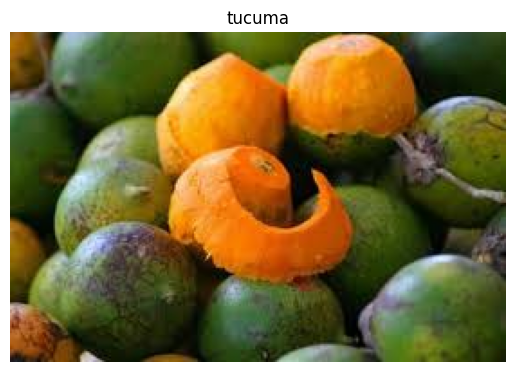

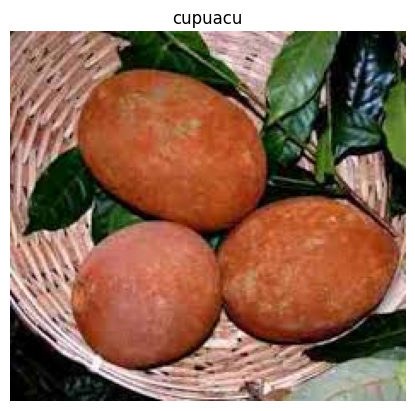

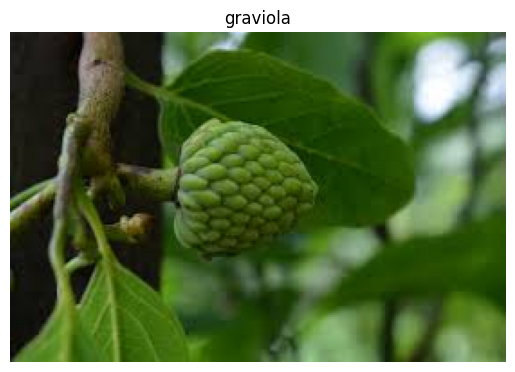

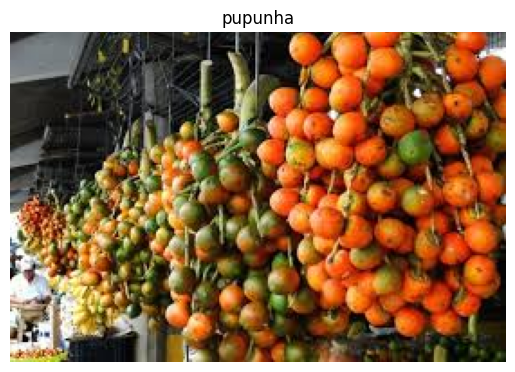

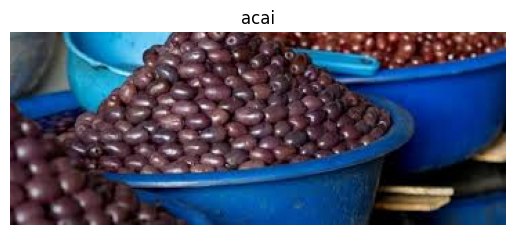

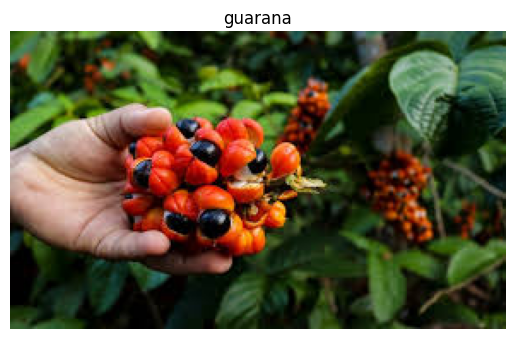

In [ ]:

# Directory containing training images
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'

# Get list of subdirectories (each representing a class)
classes = os.listdir(train_dir)

# Display one image from each class
for class_name in classes:
    # Get list of image files in current class directory
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    # Load and display one image from current class
    if len(image_files) > 0:
        # Choose the first image from the class
        image_path = os.path.join(class_dir, image_files[0])
        img = load_img(image_path)

        # Display image with class name as title
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


## Check for Corrupted Images

In [ ]:
# Check for corrupted images and remove them
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()  # Verify if image is valid
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print list of corrupted images if any
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


## Image Data Load

In [ ]:
import tensorflow as tf

# Image dimensions
img_height, img_width = 180, 180
# Batch size
batch_size = 32
# Validation split ratio
validation_split = 0.2

# Define the directory containing your image data
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'
val_dir = '/content/drive/MyDrive/FruitinAmazon/test'

# Create training dataset with split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    )

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,

   )

# Display the first batch from training dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Using 6 files for validation.
Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


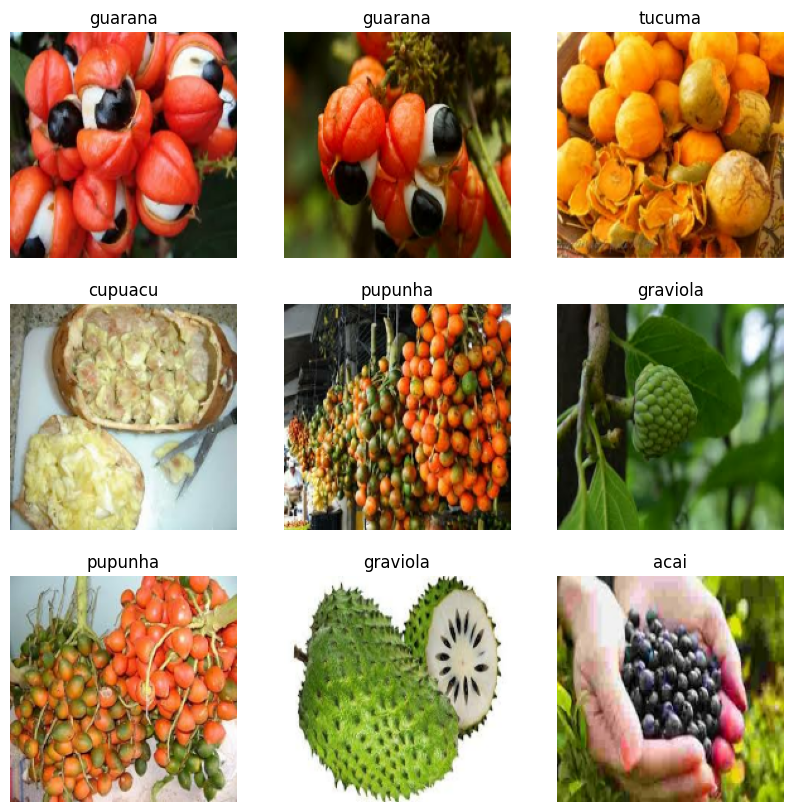

In [ ]:
import matplotlib.pyplot as plt

# Display the first batch from training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()


# Model Architectute

## Convolutional Architecture:
1.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
2.   Activation layer [ReLU]
3.   Pooling Layer [max,  F=(2,2), s=2]
4.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
5.   Activation layer [ReLU]
6.   Pooling Layer [max, F=(2,2), s=2]

## Fully Connected Network Architecture:
1. Flatten the input coming from convolutional layer
2. Input Layer/Hidden layer [number of neurons --> 64]
3. Output Layer [number of neurons = num_classes]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(input_shape, num_classes):
    """
    Generates a convolutional neural network (CNN) model.

    Parameters:
        input_shape (tuple): The shape of the input images (height, width, channels).
        num_classes (int): The number of classes for classification.

    Returns:
        tf.keras.Sequential: A CNN model configured according to the specified input shape and number of classes.
    """
    model = tf.keras.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage:
input_shape = (180, 180, 3)  # Assuming images are RGB with size 180x180 pixels
num_classes = 10  # Number of output classes
model = generate_model(input_shape, num_classes)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 118336)            0

# Model Summary and Computational Graph

In [ ]:
input_shape = (img_height, img_width, 3)
num_classes = len(train_ds.class_names)

In [ ]:
model = generate_model(input_shape, num_classes)

In [ ]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 118336)           

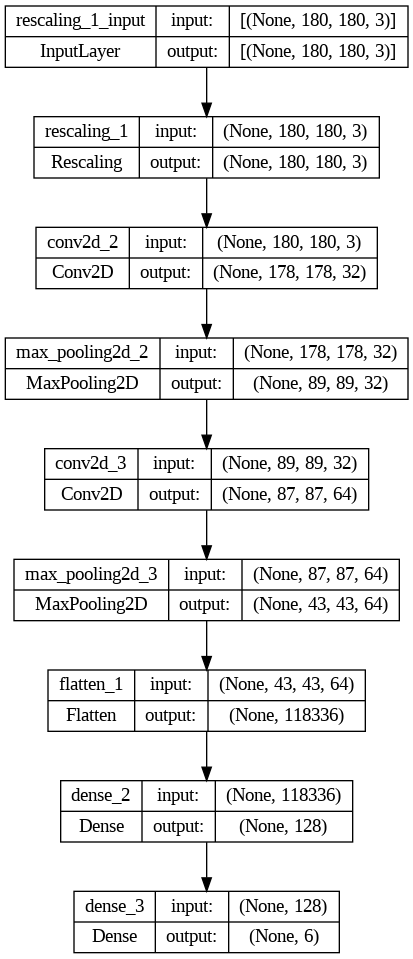

In [ ]:
# Plot model graph
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',  # You can use other optimizers like 'sgd', 'rmsprop', etc.
    loss='sparse_categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']  # You can add other metrics like 'precision', 'recall', etc.
)

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 118336)           

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 5.7941 - accuracy: 0.1806 - val_loss: 5.5129 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 4.6159 - accuracy: 0.2083 - val_loss: 2.3094 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 1.9979 - accuracy: 0.4028 - val_loss: 1.6638 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 1.5596 - accuracy: 0.3472 - val_loss: 1.6224 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 4s 998ms/step - loss: 1.0770 - accuracy: 0.7778 - val_loss: 0.8957 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.7085 - accuracy: 0.6806 - val_loss: 1.7861 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 5s 1s/step - loss: 0.4693 - accuracy: 0.8889 - val_loss: 1.0761 - val_accuracy: 0.6667
Epoch 8/10
3/3 [======================

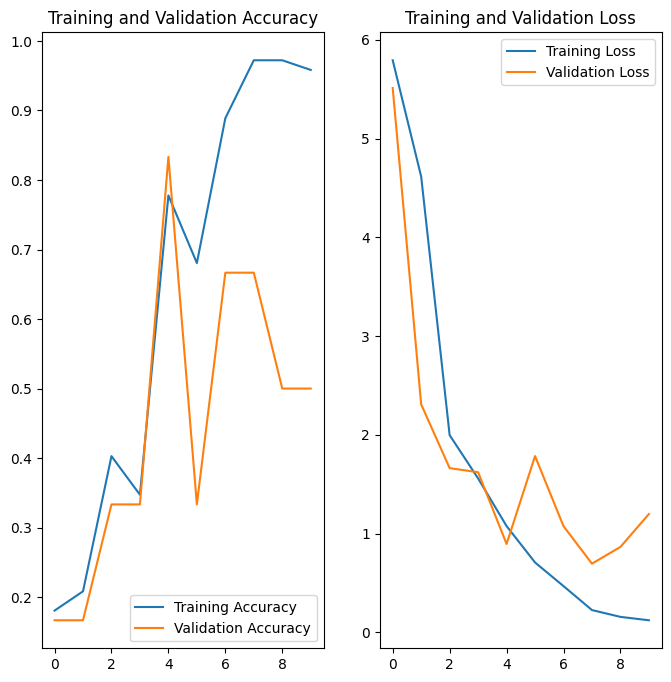

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Question:
Why do you think our model performed the way it performed?

What we can do to improve the model performance?


# Evaluate the Model

In [ ]:
# Directory containing test images
test_dir = '/content/drive/MyDrive/FruitinAmazon/test'

# Create test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 30 files belonging to 6 classes.
1/1 [==============================] - 3s 3s/step - loss: 0.8750 - accuracy: 0.6333
Test Loss: 0.8750394582748413
Test Accuracy: 0.6333333253860474
